In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data
import yfinance as yf

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#globals creates that string name from tech_list into a DataFrame variable
for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,172.081993,173.682590,170.808367,172.379203,171.950141,5.928801e+07
std,17.712812,17.448009,17.714587,17.504910,17.677828,1.777395e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,2.404830e+07
25%,161.474998,162.250000,160.294998,161.415001,160.762878,4.790395e+07
50%,175.179993,176.970001,173.820007,175.460007,175.229156,5.520920e+07
75%,186.779999,188.080002,185.119995,187.220001,186.952614,6.583690e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-30 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

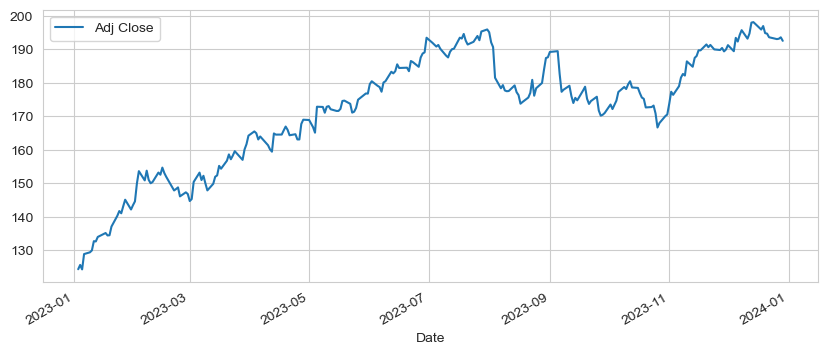

In [4]:
# historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

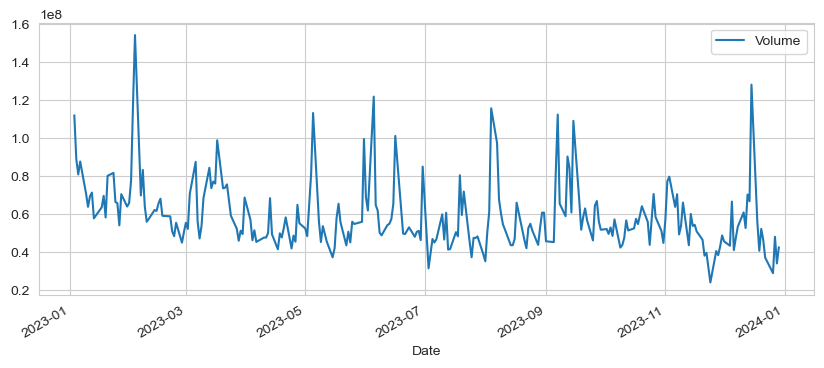

In [5]:
# plot total volume of stock being tarded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [6]:
ma_day=[10,20,50]

for ma in ma_day:
    
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

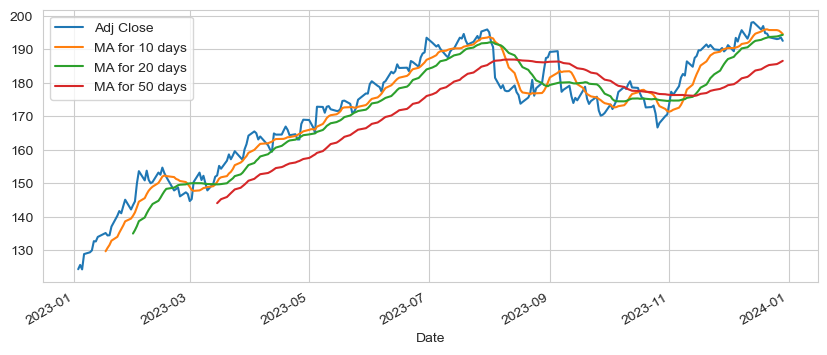

In [7]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

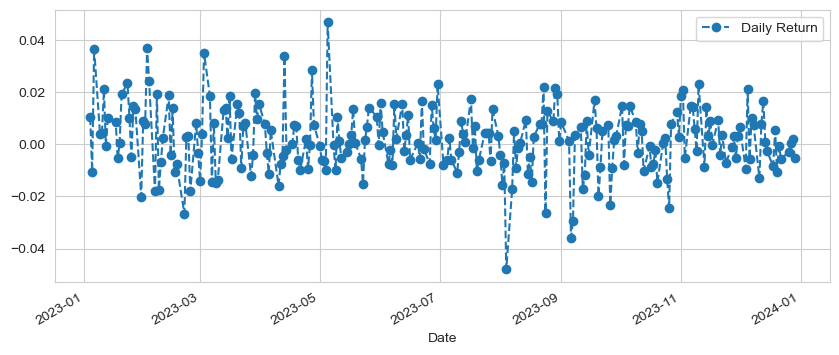

In [8]:
# percentage of the daily return
#pct_change - percentage change between the current and a prior element
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\anale\AppData\Local\Temp\ipykernel_16216\574779058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

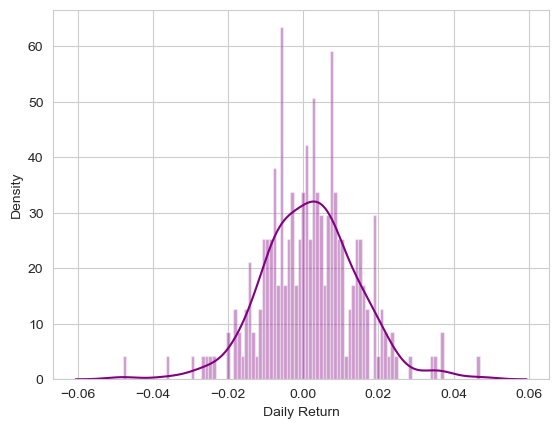

In [9]:
#  average daily return using histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<Axes: >

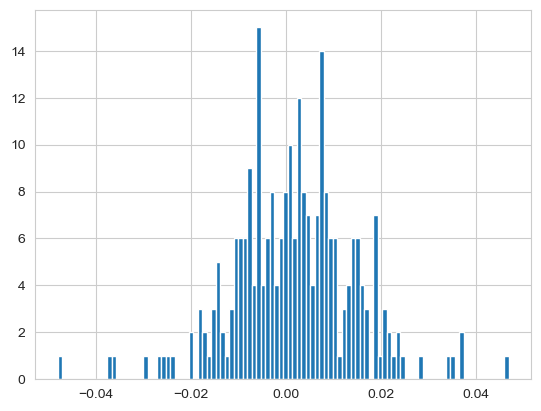

In [20]:
# use pandas hist to plot the same thing
AAPL['Daily Return'].hist(bins=100)

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df=yf.download(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [11]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,124.374802,85.820000,89.699997,237.474350
2023-01-04,125.657639,85.139999,88.709999,227.086456
2023-01-05,124.325081,83.120003,86.769997,220.356110
2023-01-06,128.899506,86.080002,88.160004,222.953079
2023-01-09,129.426575,87.360001,88.800003,225.123840


In [12]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743
2023-01-05,-0.010605,-0.023726,-0.021869,-0.029638
2023-01-06,0.036794,0.035611,0.016019,0.011785
2023-01-09,0.004089,0.014870,0.007260,0.009736


[*********************100%%**********************]  2 of 2 completed


Text(0.05, 0.95, ' pearsonr = 0.9; p = 2.0329223964668574e-91 ')

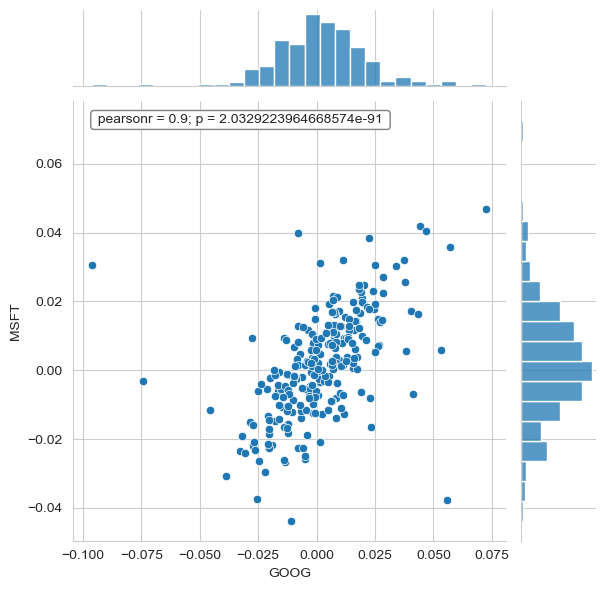

In [13]:
# import pearsonr
from  scipy.stats import pearsonr

tickers = ['GOOG','MSFT']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
tickers_df = yf.download(tickers,start,end)['Adj Close']

pearson,p = pearsonr(tickers_df['GOOG'].dropna(),tickers_df['MSFT'].dropna())
pearson = round(pearson,2)


# Compare the daily returns of Microsoft and Google
g = sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')
g.ax_joint.text(
    s=f' pearsonr = {pearson}; p = {p} ',x=.05,y=.95,transform=g.ax_joint.transAxes,
    bbox={'boxstyle':'round','pad':0.25,'facecolor':'white','edgecolor':'gray'})

PEARSONR value (**Pearson correlation value**) is a corelation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations.

**P-value** helps to asses whether a correlation is real (statistically significant). If the p-value is low (less than 0.05) then the correlation is statistically significant, and you can use the calculated Pearson coefficient. If the p-value is not low (higher than 0.05), correlation is not statistically significant and you should not rely on the calculated Pearson coefficient.


In [14]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743
2023-01-05,-0.010605,-0.023726,-0.021869,-0.029638
2023-01-06,0.036794,0.035611,0.016019,0.011785
2023-01-09,0.004089,0.014870,0.007260,0.009736


C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


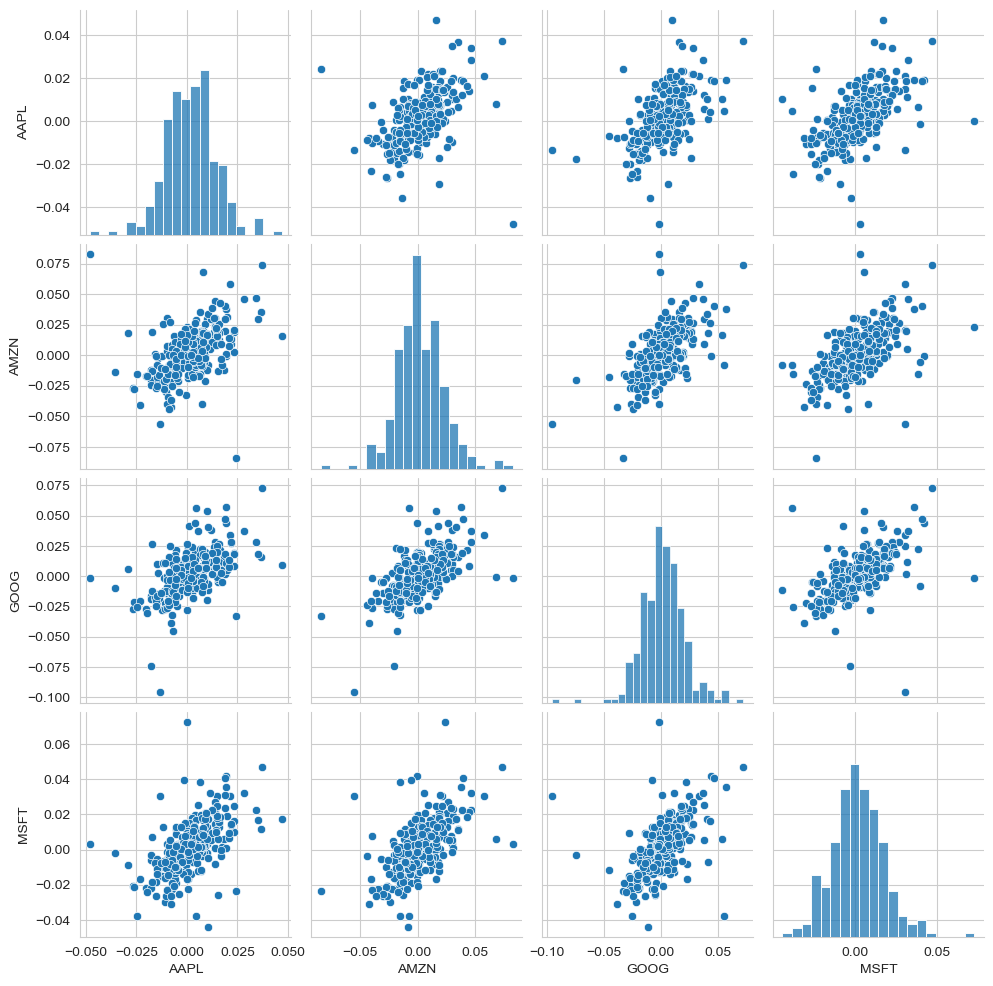

In [15]:
sns.pairplot(tech_rets.dropna())

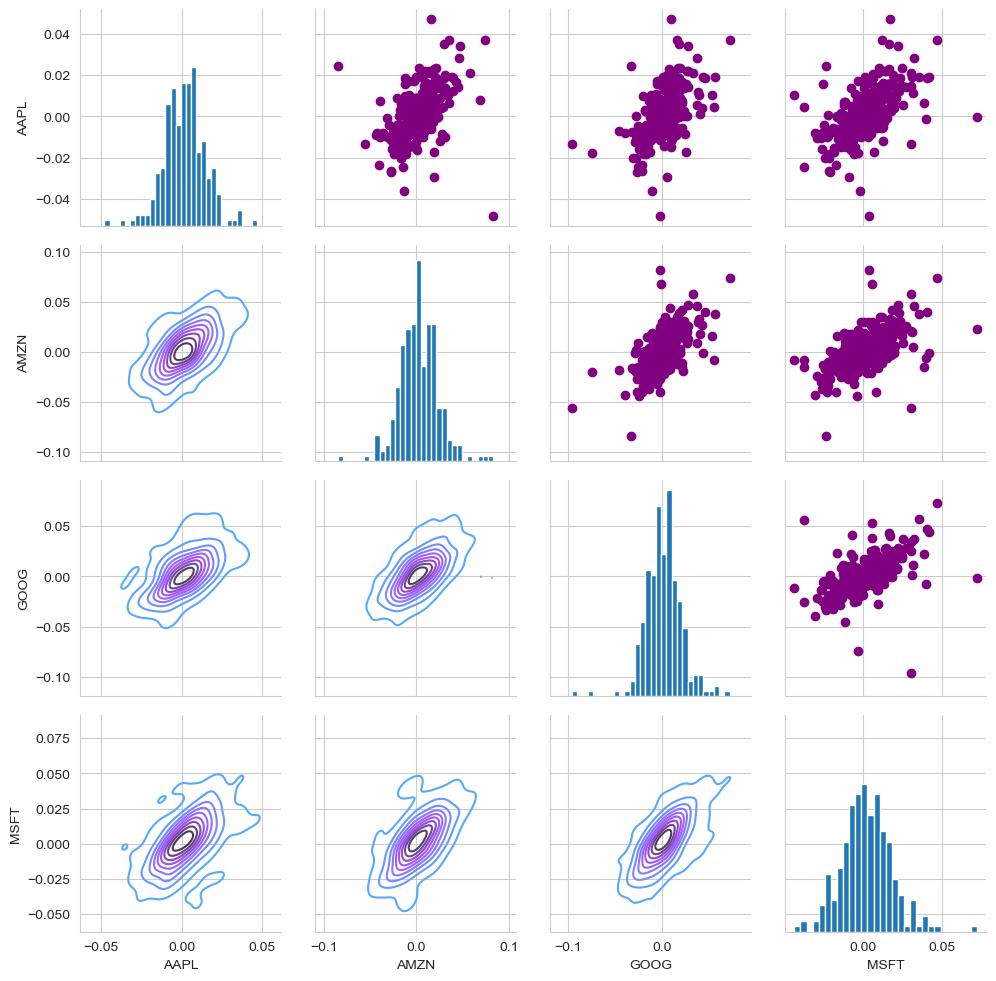

In [16]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

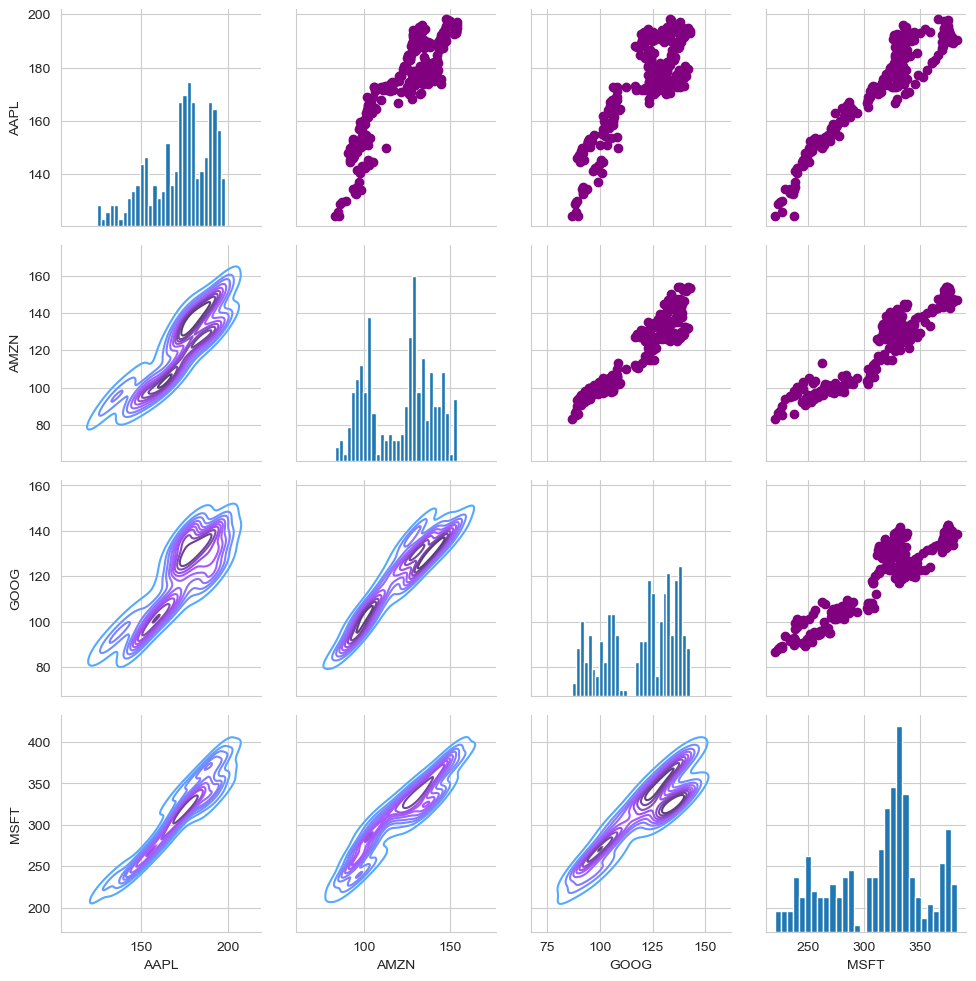

In [17]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

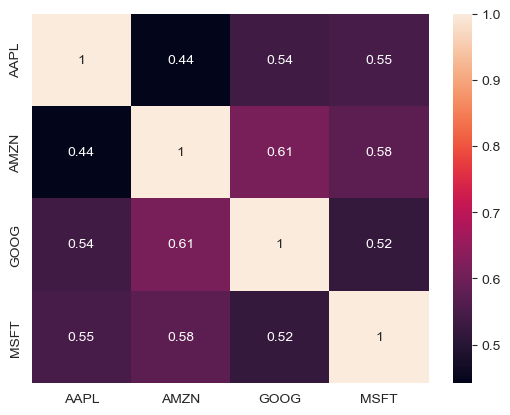

In [18]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

<Axes: >

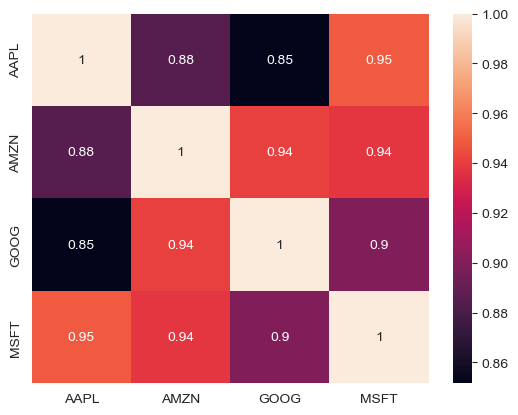

In [19]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

### Risk analysis
 1. Compare daily percentege returns with the standard deviation of the daily returns (risk). 


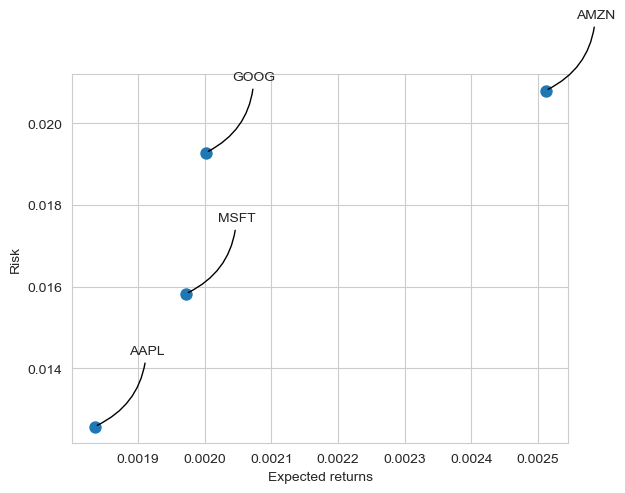

In [20]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(x=rets.mean(),y=rets.std(),s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

# Label the scatter plots
# http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,  
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color = 'black', connectionstyle = 'arc3,rad=-0.3'))